# New Crab Data

Explore new Crab data from Dieter's 2022 data.

In [1]:
import sys
sys.path.append("/Users/manuelmeyer/Python/crabmeyerpy/")

In [2]:
from crabmeyerpy.data import CrabData
import matplotlib.pyplot as plt
import numpy as np

Plot the old data

In [4]:
cd = CrabData("../data/crab_data.npy", d=2.)

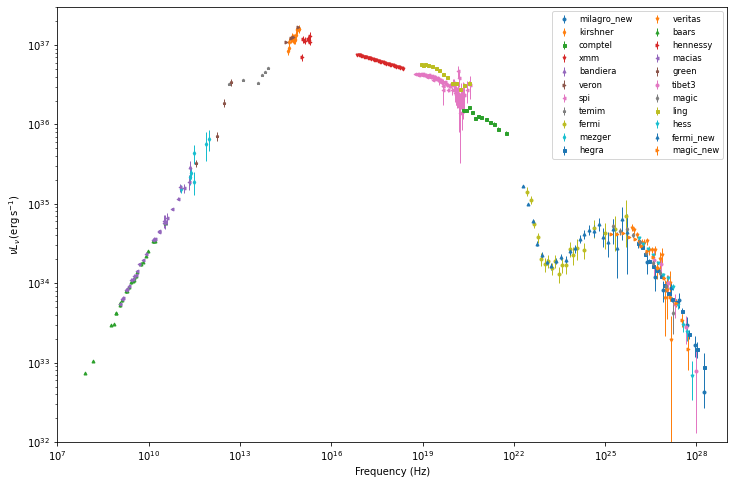

In [13]:
plt.figure(figsize=(12,8))

# plot the data:
marker = ['o', 'd', 's', 'v', '^', '>', '<', '*']
for i, k in enumerate(cd.data.keys()):
    x, y, dy = cd.get_data_set(k, log=False, yunit="nuLnu")
    plt.errorbar(x, y, yerr=dy,
                 ls='none', label=k, 
                 ms=3, marker=marker[i % len(marker)],
                 elinewidth=1
                )
    
plt.legend(loc=0, fontsize='small', ncol=2)
    
plt.ylim(1e32,3e37)
plt.xlim(1e7,1e29)
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\nu L_\nu\,(\mathrm{erg}\,\mathrm{s}^{-1}$)")
plt.xscale("log")
plt.yscale("log")

Get Dieter's new data

In [17]:
data_new = np.loadtxt("../data/horns2022_nuLnu.dat").T
data_new.shape

(5, 203)

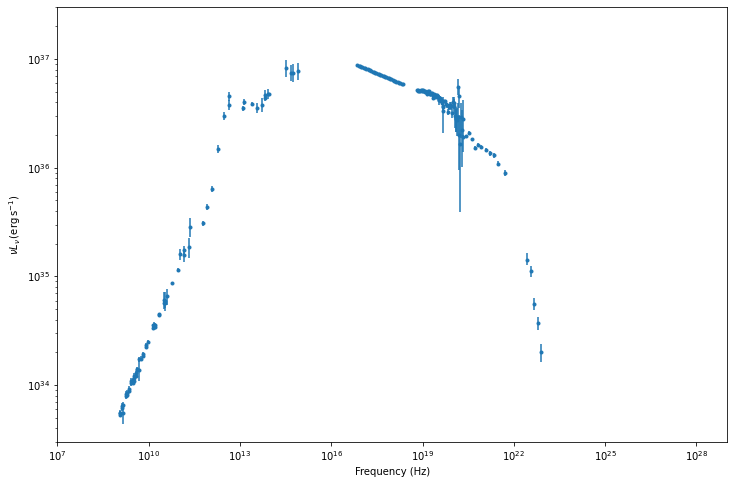

In [23]:
plt.figure(figsize=(12,8))

plt.errorbar(data_new[0], data_new[1], 
             yerr=[data_new[1] - data_new[2], data_new[3] - data_new[1]], 
             marker='.', 
             ls='none')

plt.ylim(3e33,3e37)
plt.xlim(1e7,1e29)
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\nu L_\nu\,(\mathrm{erg}\,\mathrm{s}^{-1}$)")
plt.xscale("log")
plt.yscale("log")

Comparison of old and new data

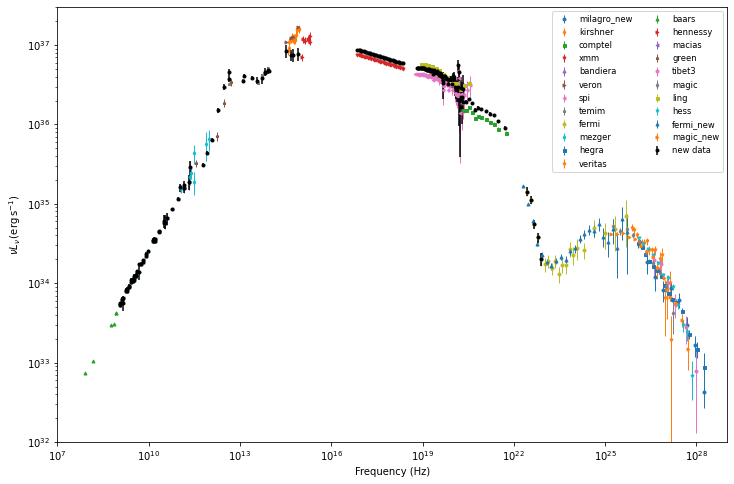

In [27]:
plt.figure(figsize=(12,8))

# plot the data:
marker = ['o', 'd', 's', 'v', '^', '>', '<', '*']
for i, k in enumerate(cd.data.keys()):
    x, y, dy = cd.get_data_set(k, log=False, yunit="nuLnu")
    plt.errorbar(x, y, yerr=dy,
                 ls='none', label=k, 
                 ms=3, marker=marker[i % len(marker)],
                 elinewidth=1
                )
    
plt.errorbar(data_new[0], data_new[1], 
             yerr=[data_new[1] - data_new[2], data_new[3] - data_new[1]], 
             marker='.', 
             ls='none', 
             label="new data",
             color='k',
            )
    
plt.legend(loc=0, fontsize='small', ncol=2)
    
plt.ylim(1e32,3e37)
plt.xlim(1e7,1e29)
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\nu L_\nu\,(\mathrm{erg}\,\mathrm{s}^{-1}$)")
plt.xscale("log")
plt.yscale("log")
plt.savefig("old_vs_new_data_crab.pdf")
plt.savefig("old_vs_new_data_crab.png", dpi=150)